In [2]:

import sys, os

root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_path not in sys.path:
    sys.path.append(root_path)


from src.load_data import * 
from src.model import * 
from src.training import *
import torch.optim as optim


## Load Data 

In [ ]:
train_loader , test_loader = create_data()

In [6]:
images, labels = next(iter(train_loader))
print(images.shape) 
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


## Visualize Data 

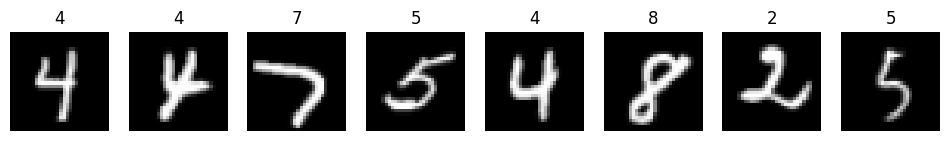

In [7]:

fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i, ax in enumerate(axes):
    img = denormalize(images[i]).squeeze(0)  
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{labels[i].item()}")
    ax.axis("off")

plt.show()

## Create the model 

In [30]:

generador = Generator(latent_dim=100, img_channels=1, img_size=32, batch_norm=True)
discrimiador = Discriminator(img_channels=1, img_size=32, batch_norm=False)


generador.apply(weights_init_normal)
discrimiador.apply(weights_init_normal)

criterion = nn.BCELoss()
optimizerGen = optim.Adam(generador.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizerDisc = optim.Adam(discrimiador.parameters(), lr=2e-4, betas=(0.5, 0.999))


## Train the model 

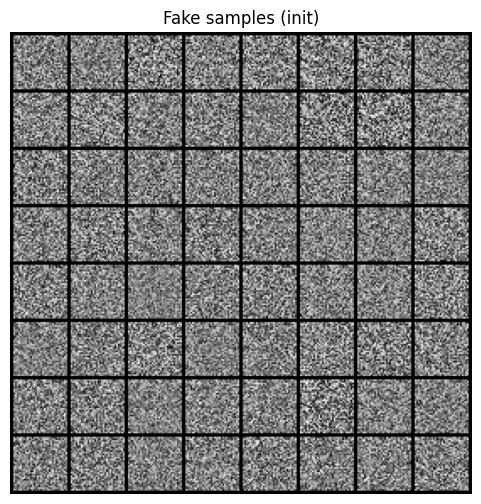

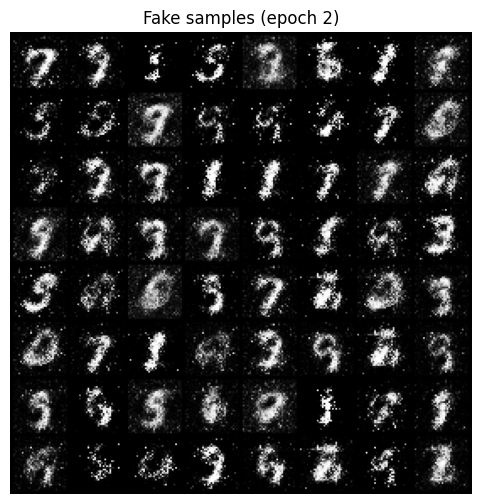

[Epoch 001/20]  loss_D=0.6085 | loss_G=1.0934
[Epoch 002/20]  loss_D=0.5970 | loss_G=1.1619


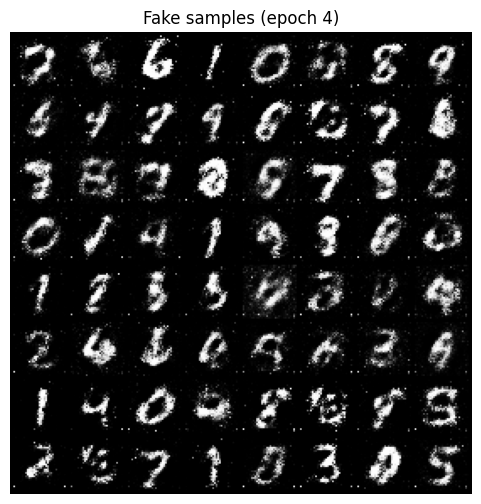

[Epoch 003/20]  loss_D=0.6219 | loss_G=0.9987
[Epoch 004/20]  loss_D=0.6437 | loss_G=0.9030


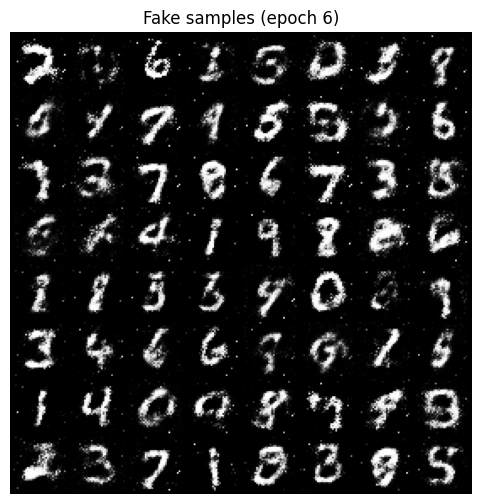

[Epoch 005/20]  loss_D=0.6588 | loss_G=0.8430
[Epoch 006/20]  loss_D=0.6653 | loss_G=0.8207


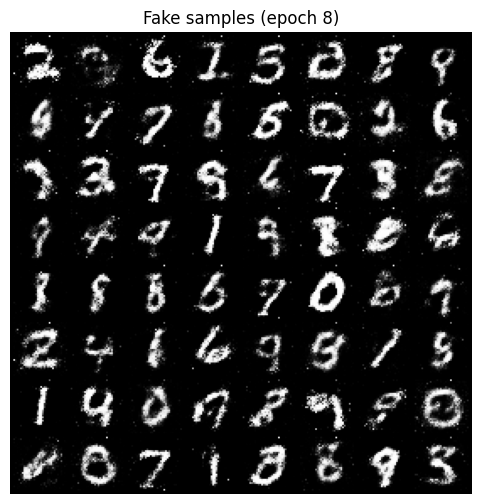

[Epoch 007/20]  loss_D=0.6723 | loss_G=0.7936
[Epoch 008/20]  loss_D=0.6757 | loss_G=0.7810


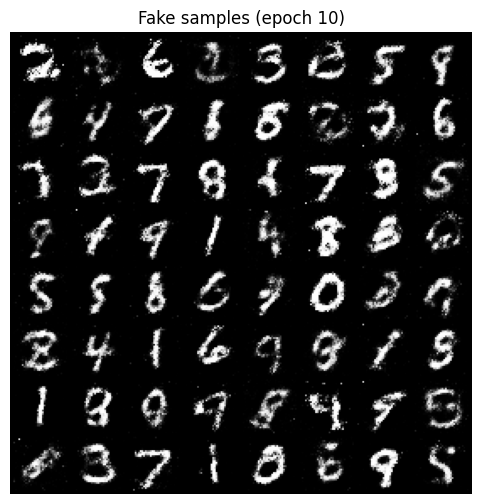

[Epoch 009/20]  loss_D=0.6806 | loss_G=0.7612
[Epoch 010/20]  loss_D=0.6834 | loss_G=0.7502


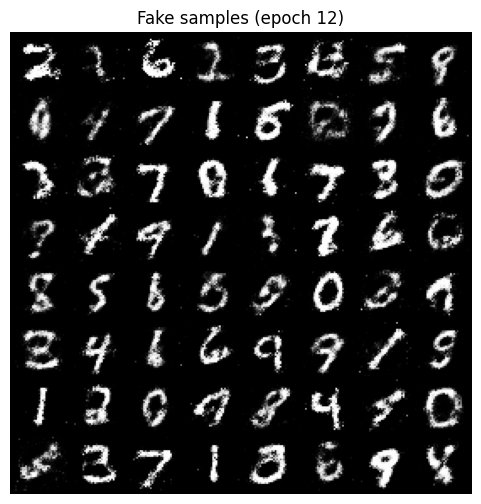

[Epoch 011/20]  loss_D=0.6867 | loss_G=0.7351
[Epoch 012/20]  loss_D=0.6872 | loss_G=0.7342


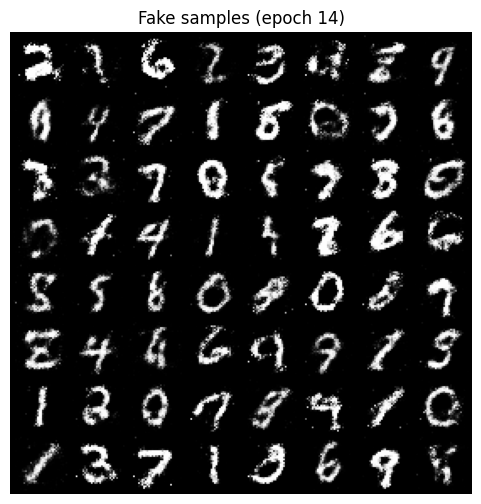

[Epoch 013/20]  loss_D=0.6892 | loss_G=0.7231
[Epoch 014/20]  loss_D=0.6903 | loss_G=0.7186


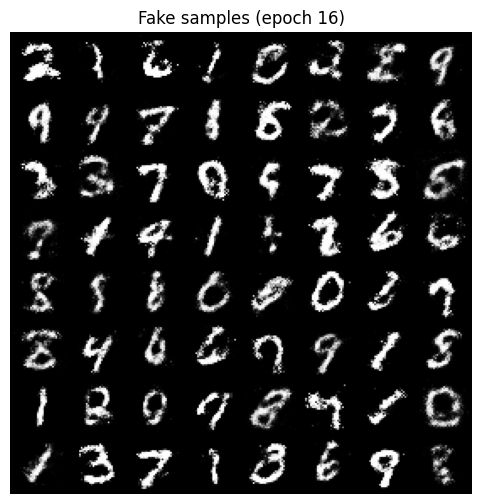

[Epoch 015/20]  loss_D=0.6911 | loss_G=0.7133
[Epoch 016/20]  loss_D=0.6915 | loss_G=0.7110


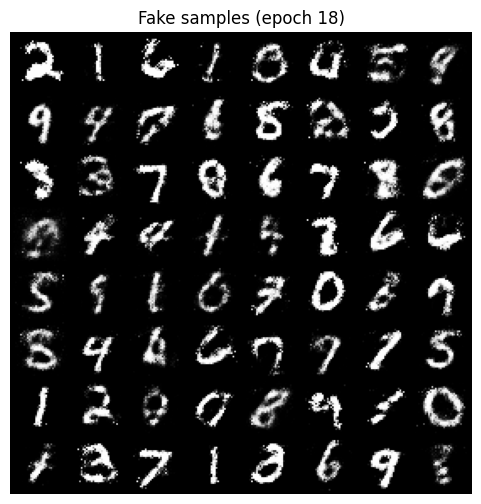

[Epoch 017/20]  loss_D=0.6917 | loss_G=0.7082
[Epoch 018/20]  loss_D=0.6926 | loss_G=0.7040


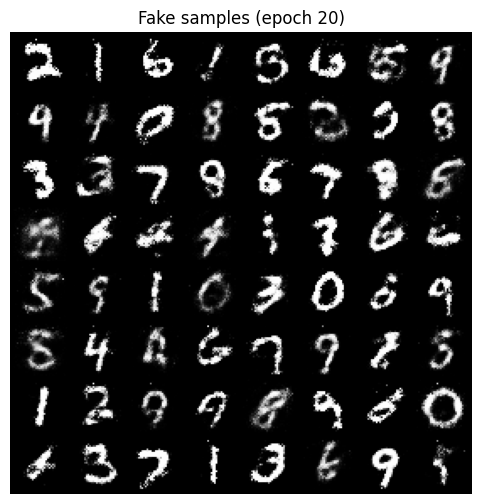

[Epoch 019/20]  loss_D=0.6926 | loss_G=0.7047
[Epoch 020/20]  loss_D=0.6922 | loss_G=0.7043


In [32]:

history = train_gan( train_loader=train_loader,
    generador=generador, discriminador=discrimiador, optimizerG=optimizerGen, optimizerD=optimizerDisc,
    criterion=criterion,
    latent_dim=100, epochs=20, sample_every=1)
